# Anomaly Detection : Credit card

## To detect credit card fraud, I use Gaussian kernel density estimation and a dataset from Kaggle.

In [21]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
creditcard = pd.read_csv(f"{path}/creditcard.csv")


In [22]:
creditcard.drop(columns={'Time'},inplace=True)
creditcard

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
plt.rcParams['axes.grid'] = True
from scipy import stats
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Kernel-density Estimation

### Kernel density estimation attempts to estimate the density directly from the data without assuming a particular form for the underlying distribution (non-parametric density estimation)

# Split the data  



In [24]:
X_train, X_test, y_train, y_test = train_test_split(creditcard.drop('Class', axis=1, inplace=False), df.Class, test_size=0.3, random_state=0)
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


# Comparing the distribution of fraudulent vs. non-fraudulent data for all features

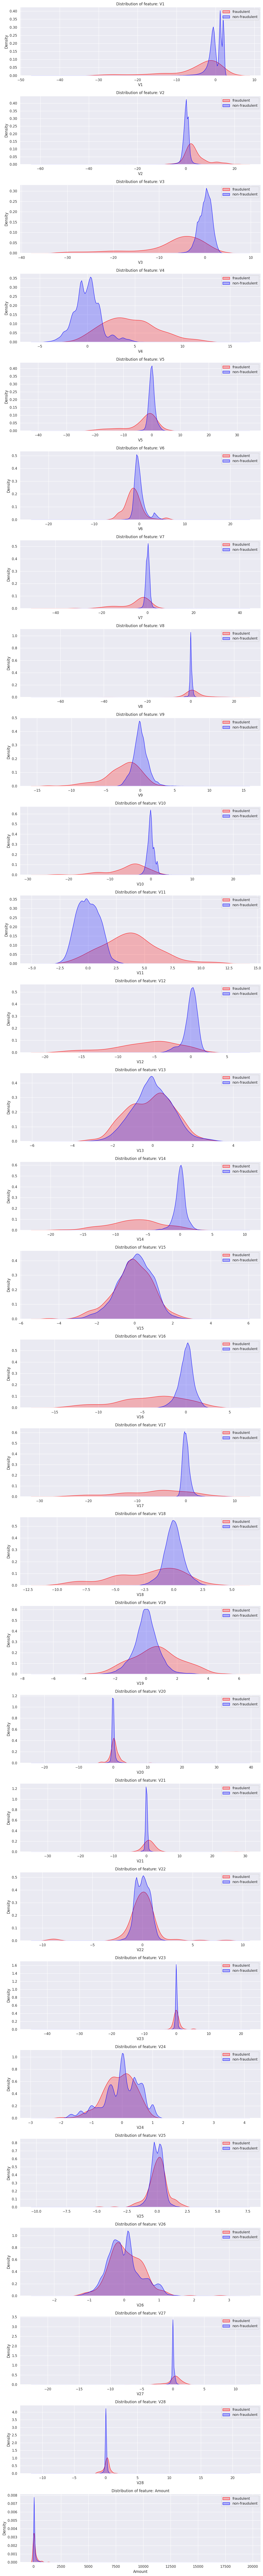

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


features = [f for f in creditcard.drop('Class', axis=1).columns]
nplots = len(features)
fig, axes = plt.subplots(nplots, 1, figsize=(12, 4 * nplots), sharex=False)

for i, feat in enumerate(features):
    ax = axes[i] if nplots > 1 else axes
    sns.kdeplot(data=X_train[feat][y_train == 1], fill=True, label='fraudulent', color="red", ax=ax)
    sns.kdeplot(data=X_train[feat][y_train == 0], fill=True, label='non-fraudulent', color="blue", ax=ax)
    ax.set_title(f'Distribution of feature: {feat}')
    ax.legend()

plt.tight_layout()
plt.show()


For features like V4 and V11, the non-overlapping regions of the KDE plots indicate a higher likelihood of fraud. These features can serve as strong indicators in a fraud detection model. Additionally, features like V14, V16, and V17 exhibit extreme values and long tails, making them useful for detecting fraudulent data.

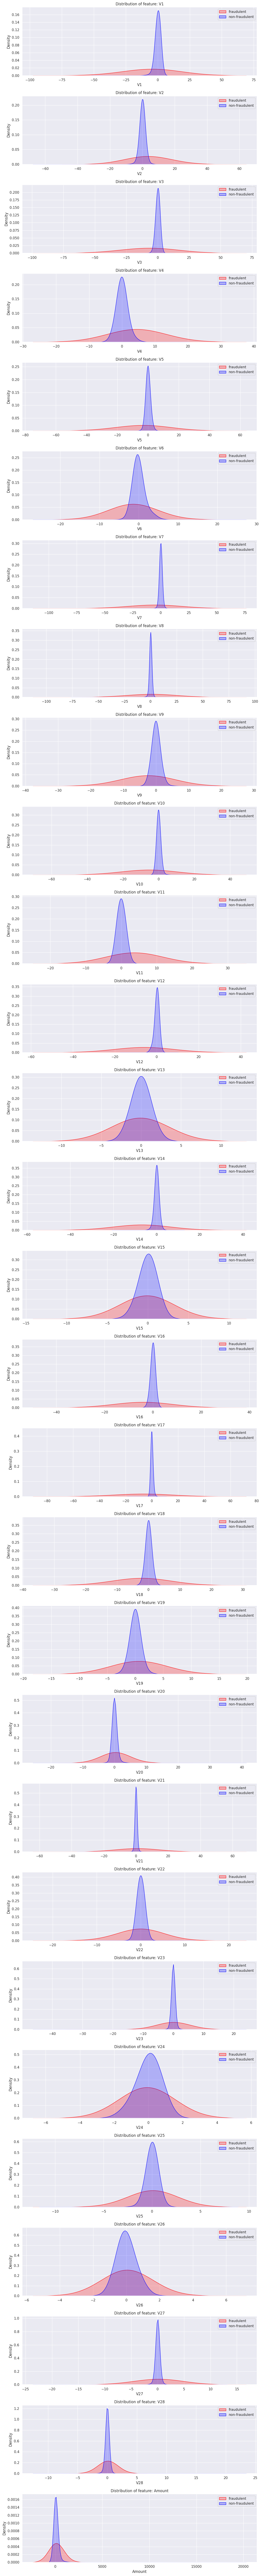

In [26]:
features = [f for f in creditcard.drop('Class', axis=1).columns]
nplots = len(features)
fig, axes = plt.subplots(nplots, 1, figsize=(12, 4 * nplots), sharex=False)

bw_adjust_value = 10

for i, feat in enumerate(features):
    ax = axes[i] if nplots > 1 else axes
    sns.kdeplot(data=X_train[feat][y_train == 1], fill=True, label='fraudulent', color="red", ax=ax, bw_adjust=bw_adjust_value)
    sns.kdeplot(data=X_train[feat][y_train == 0], fill=True, label='non-fraudulent', color="blue", ax=ax, bw_adjust=bw_adjust_value)
    ax.set_title(f'Distribution of feature: {feat}')
    ax.legend()

plt.tight_layout()
plt.show()

When the bandwidth is increased, more data points fall within the range of the kernel, causing the KDE to spread out and appear smoother. To prove and compare this, I set the bandwidth as 10. As you can see, the curve becomes smoother. However, this comes with certain drawbacks.

- First, Loss of Detail: As the bandwidth increases, the curve becomes overly smooth, ignoring the finer details between data points. Small variations or clusters in the data may disappear, and important patterns, outliers, or peaks might get diluted by the smooth curve. As a result, critical features of the data might not be properly analyzed.

- Second, Overgeneralization: A large bandwidth can overgeneralize the data distribution, creating a mismatch between the actual data and the KDE estimate. For example, multiple peaks in the data may merge into a single peak, leading to a loss of meaningful information. This could result in misunderstanding or drawing incorrect conclusions about the data distribution.

- Third, Difficulty in Detecting Outliers: With a larger bandwidth, the KDE curve becomes broader, making it harder to detect low-density regions that represent outliers. For instance, rare events or extreme values in the tails of the distribution might be smoothed over, effectively hiding them within the broader curve. This makes it challenging to identify anomalies, such as fraudulent data.

- Finally, Unrealistic Boundaries: When the bandwidth is too large, the KDE might extend excessively beyond the data's actual range, or assign unrealistic density to values that have no significance. This can result in misleading predictions or an inaccurate representation of the data's true behavior.

In summary, while increasing the bandwidth results in a smoother curve, it can lead to a loss of important details, overgeneralization, difficulty detecting outliers, and unrealistic boundary estimations. Therefore, choosing an appropriate bandwidth is critical to achieving a balance between smoothness and preserving the data's essential characteristics.

# The concept of Kernel Density Estimation

# Kernel Density Estimation

## Kernel-density Estimation

1. The probability that a vector $ \mathbf{x} $, drawn from a distribution $ p(\mathbf{x}) $, will fall in a given region $ R $ of the sample space:

   $$
   P = \int_R p(\mathbf{x}') d\mathbf{x}'
   $$

2. Suppose that $ N $ vectors $ \{\mathbf{x}^1, \mathbf{x}^2, \dots, \mathbf{x}^N\} $ are drawn from the distribution; the probability that $ k $ of these $ N $ vectors fall in $ R $ is given by:

   $$
   P(k) = \binom{N}{k} P^k (1 - P)^{N - k}
   $$

3. It can be shown that (from the binomial distribution) the mean and variance of the ratio $ \frac{k}{N} $ are:

   $$
   E \left[ \frac{k}{N} \right] = P, \quad \text{Var} \left[ \frac{k}{N} \right] = \frac{P(1 - P)}{N}
   $$

## Additional Kernel-density Estimation Details

4. As $ N \to \infty $, the distribution becomes sharper (the variance gets smaller), so we can expect that a good estimate of the probability $ P $ can be obtained from the mean fraction of the points that fall within $ R $:

   $$
   P \approx \frac{k}{N}
   $$

5. If we assume that $ R $ is so small that $ p(\mathbf{x}) $ does not vary appreciably within it, then:

   $$
   P = \int_R p(\mathbf{x}') d\mathbf{x}' \approx p(\mathbf{x}) V
   $$

   where $ V $ is the volume enclosed by region $ R $.

6. Merging the two previous results:

   $$
   P = \int_R p(\mathbf{x}') d\mathbf{x}' \approx p(\mathbf{x}) V \approx \frac{k}{N}, \quad p(\mathbf{x}) \approx \frac{k}{N V}
   $$

---

# Parzen Window Density Estimation

## Parzen Window Density Estimation

- Assume that the region $ R $ that encloses the $ k $ examples is a **hypercube** with sides of length $ h $ centered at $ \mathbf{x} $.
  - Its volume is given by $ V = h^d $, where $ d $ is the number of dimensions.

- Define a kernel function $ K(\mathbf{u}) $:

   $$
   K(\mathbf{u}) = \begin{cases}
       1 & \text{if } |u_j| < \frac{1}{2} \quad \forall j = 1, \dots, d \\
       0 & \text{otherwise}
       \end{cases}
   $$

- Using this kernel function, we define $ k $ and $ p(\mathbf{x}) $ as follows:

   $$
   k = \sum_{i=1}^{N} K \left( \frac{\mathbf{x}^i - \mathbf{x}}{h} \right)
   $$

   $$
   p(\mathbf{x}) = \frac{1}{N h^d} \sum_{i=1}^{N} K \left( \frac{\mathbf{x}^i - \mathbf{x}}{h} \right)
   $$

When a data point belongs to a specific class $ \omega_i $, the probability density for the values of variables $ x_1 $ and $ x_2 $ can be represented using KDE or a distribution function.

---

# Parzen Window Density Estimation: Drawbacks and Improvements

This slide explains the drawbacks and improvements of Parzen Window Density Estimation. Key points are as follows:

---

## 1. Drawbacks of $K(u)$

- **Discontinuities**:
  - $K(u)$ is typically a rectangular (box-shaped) kernel, treating all points inside the window equally and ignoring points outside the window. This results in discontinuities in the density estimation curve.
  - Such discontinuities make the density curve appear unnatural and fail to represent the smooth distribution of the actual data.

- **Equal Weight for All Points**:
  - $K(u)$ gives the same weight to all points $x_i$ within the window. In other words, data points close to the center $x$ and those farther away have the same influence.
  - For example, a point very close to $x$ and a point far away are both considered equally, which can hinder precise density estimation.

---

## 2. Solution: Use of Smooth Kernel Function

To address these issues, a smooth kernel function can be used. A smooth kernel function has the following characteristics:

- **Smooth Density Function**:
  - It is usually **radially symmetric** and **unimodal**.
  - The most commonly used smooth kernel function is the **Gaussian kernel**. With a Gaussian kernel, data points closer to the center receive higher weights, while points farther away receive lower weights, allowing for a more natural density estimation.

- **Comparison of Rectangular and Gaussian Kernels**:
  - **Rectangular Kernel** (left figure, $Parzen(u)$): This method assigns the same weight to all points within the window, leading to abrupt changes at the window's boundary.
  - **Gaussian Kernel** (right figure, $K(u)$): In this method, weights gradually decrease as the distance from the center increases, resulting in a smooth probability density function.

---

## Explanation of Formulas

- **Integral Condition**:
  - To be a valid probability density function, the kernel function must integrate to 1 over the entire region. This ensures that the sum of probabilities for all data points is 1.
  $$
  P = \int_R K(x) \, dx = 1
  $$

- **Density Estimation Formula**:
  - The density estimation using a smooth kernel is expressed as:
  $$
  p(x) = \frac{1}{N h^d} \sum_{i=1}^{N} K \left( \frac{x^i - x}{h} \right)
  $$
  - Here, $K \left( \frac{x^i - x}{h} \right)$ smoothly reflects how close each data point is to the center $x$, allowing for a smoother overall density estimate.

---

## 2D Parzen Window Density Estimation with Square Window

In basic Parzen window density estimation, a square-shaped window can also be used in 2D to calculate probability density. In this case, the **rectangular kernel (indicator function in square shape)** acts as the probability density function.

### 1. Parzen Window Density Estimation in 2D
- In 2D space, a square window centered at $x$ is defined.
- Density is calculated by determining whether each data point falls inside this square.
- The **area** of the square window is defined as $h^2$, and this area is used to estimate the probability density.

For example, in 2D, suppose $K(u)$ is defined as the following indicator function:

$$
K(u) = \begin{cases}
1 & \text{if } |u_1| < \frac{1}{2} \text{ and } |u_2| < \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}
$$

where:
- $u = \frac{x^i - x}{h}$ represents the distance of data point $x^i$ from the center $x$.
- If the data is within the square window, $K(u) = 1$; otherwise, $K(u) = 0$.

### 2. Rectangular Kernel as a Probability Density Function
Using a 2D square window for probability density estimation results in a coarse density estimation because:
- All points within the window are given equal weight, causing **discontinuity** at the window boundaries.
- Regardless of their position inside the window, all data points are treated with equal importance.

### 3. Extending to Smooth Kernels
To address the limitations of the Parzen window's discontinuity, smooth kernels like the Gaussian kernel can be used:
- In 2D, a Gaussian kernel produces a circularly symmetric shape where points closer to the center have higher values, and those farther away have lower values.
- By using a smooth kernel, the resulting probability density function is round and smooth rather than square.

---

## Summary
- In basic Parzen window density estimation, a square window serves as the probability density function in 2D.
- This square window provides a coarse density estimation and causes discontinuities at the boundaries.
- For a more natural density estimation, a smooth kernel like the Gaussian kernel can be used to produce a smooth, circular probability density function rather than a square one.
  
By combining both approaches, we can understand the strengths and weaknesses of each method in approximating the probability density function, making adjustments in bandwidth $ h $ and kernel type to obtain the most accurate representation of the data distribution.